In [11]:
import ROOT
from ROOT import RooFit as RF

from math import sqrt

In [12]:
x = ROOT.RooRealVar('x', 'm(Bs) [GeV]', -4, 4)

mean_Bs = ROOT.RooRealVar("mean_Bs", "", 0)
sigma = ROOT.RooRealVar("sigma", "", 0.8, 0., 2.)

sigma_Bs_1 = ROOT.RooRealVar("sigma_Bs_1", "", 0.2)
sigma_Bs_2 = ROOT.RooRealVar("sigma_Bs_2", "", 0.7)
sigma_Bs_3 = ROOT.RooRealVar("sigma_Bs_3", "", 1.)

fr_Bs = ROOT.RooRealVar('fr_Bs', 'fr_Bs', 0.5)
fr_Bs_1 = ROOT.RooRealVar('fr_Bs_1', 'fr_Bs_1', 0.1)
fr_Bs_2 = ROOT.RooRealVar('fr_Bs_2', 'fr_Bs_2', 0.3)

sig_Bs_1 = ROOT.RooGaussian("sig_Bs_1", "", x, mean_Bs, sigma_Bs_1)
sig_Bs_2 = ROOT.RooGaussian("sig_Bs_2", "", x, mean_Bs, sigma_Bs_2)
sig_Bs_3 = ROOT.RooGaussian("sig_Bs_3", "", x, mean_Bs, sigma_Bs_3)

# signal_Bs = ROOT.RooAddPdf("signal_Bs", "signal_Bs", ROOT.RooArgList(sig_Bs_1, sig_Bs_2), ROOT.RooArgList(fr_Bs))  ## ---- BASELINE
signal_Bs = ROOT.RooAddPdf("signal_Bs", "signal_Bs", ROOT.RooArgList(sig_Bs_1, sig_Bs_2, sig_Bs_3), ROOT.RooArgList(fr_Bs_1, fr_Bs_2))
signal = ROOT.RooGaussian("sig_Bs", "", x, mean_Bs, sigma)

[#1] INFO:Plotting -- RooAbsPdf::plotOn(signal_Bs) directly selected PDF components: (sig_Bs_1)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(signal_Bs) indirectly selected PDF components: ()
[#1] INFO:Plotting -- RooAbsPdf::plotOn(signal_Bs) directly selected PDF components: (sig_Bs_2)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(signal_Bs) indirectly selected PDF components: ()
[#1] INFO:Plotting -- RooAbsPdf::plotOn(signal_Bs) directly selected PDF components: (sig_Bs_3)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(signal_Bs) indirectly selected PDF components: ()


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


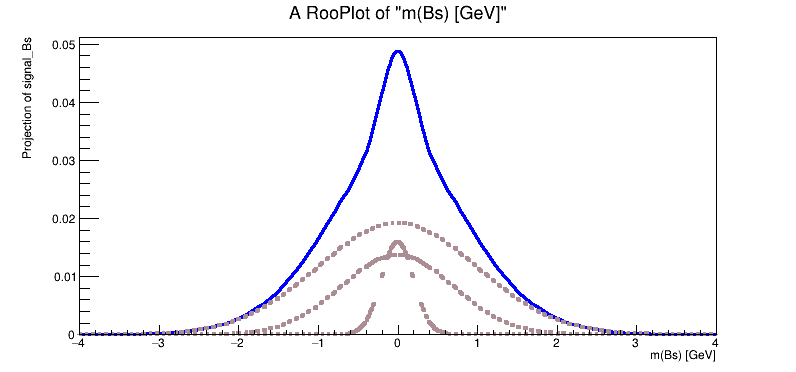

In [13]:
c = ROOT.TCanvas('c', 'c', 800, 400)
frame = x.frame()
signal_Bs.plotOn(frame)
signal_Bs.plotOn(frame, RF.Components("sig_Bs_1"), RF.LineStyle(ROOT.kDashed), RF.LineColor(47), RF.LineWidth(4));
signal_Bs.plotOn(frame, RF.Components("sig_Bs_2"), RF.LineStyle(ROOT.kDashed), RF.LineColor(47), RF.LineWidth(4));
signal_Bs.plotOn(frame, RF.Components("sig_Bs_3"), RF.LineStyle(ROOT.kDashed), RF.LineColor(47), RF.LineWidth(4));
frame.Draw()
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


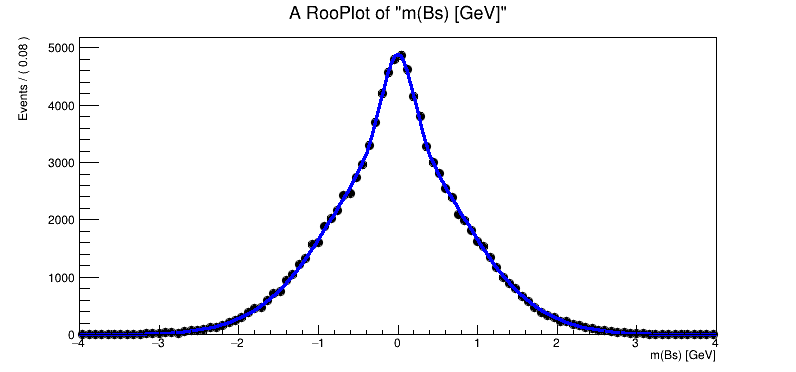

In [14]:
data = signal_Bs.generate(ROOT.RooArgSet(x), 100000)

c = ROOT.TCanvas('c', 'c', 800, 400)
frame = x.frame()
data.plotOn(frame)
signal_Bs.plotOn(frame)
frame.Draw()
c.Draw()

[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
 **********
 **   10 **SET PRINT           1
 **********
 **********
 **   11 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 sigma        8.00000e-01  2.00000e-01    0.00000e+00  2.00000e+00
 **********
 **   12 **SET ERR         0.5
 **********
 **********
 **   13 **SET PRINT           1
 **********
 **********
 **   14 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO BALANCE SPEED AGAINST RELIABILITY
 **********
 **   15 **MIGRAD         500           1
 **********
 FIRST CALL TO USER FUNCTION AT NEW START POINT, WITH IFLAG=4.
 START MIGRAD MINIMIZATION.  STRATEGY  1.  CONVERGENCE WHEN EDM .LT. 1.00e-03
 FCN=128304 FROM MIGRAD    STATUS=INITIATE        4 CALLS           5 TOTAL
                     EDM= unknown      STRATEGY= 1      NO ERROR MATRIX       
  EXT PARAMETER               CURRENT GUESS       STEP         FIRS

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


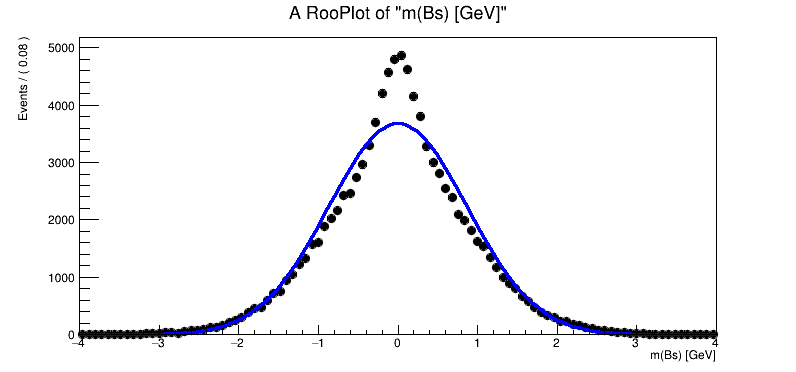

In [15]:
signal.fitTo(data)

c = ROOT.TCanvas('c', 'c', 800, 400)
frame = x.frame()
data.plotOn(frame)
signal.plotOn(frame)
# signal_Bs.plotOn(frame, RF.Components("sig_Bs_1"), RF.LineStyle(ROOT.kDashed), RF.LineColor(47), RF.LineWidth(4));
# signal_Bs.plotOn(frame, RF.Components("sig_Bs_2"), RF.LineStyle(ROOT.kDashed), RF.LineColor(47), RF.LineWidth(4));
# signal_Bs.plotOn(frame, RF.Components("sig_Bs_3"), RF.LineStyle(ROOT.kDashed), RF.LineColor(47), RF.LineWidth(4));
frame.Draw()
c.Draw()

#### **for 2 Gaussian case**

In [16]:

data.mean(x), data.sigma(x)

sqrt(fr_Bs.getVal()*sigma_Bs_1.getVal()**2 + (1-fr_Bs.getVal())*sigma_Bs_2.getVal()**2)

sqrt((1 - fr_Bs.getVal())*sigma_Bs_1.getVal()**2 + (fr_Bs.getVal())*sigma_Bs_2.getVal()**2)

sqrt(fr_Bs.getVal()**2 * sigma_Bs_1.getVal()**2 + (1-fr_Bs.getVal())**2 * sigma_Bs_2.getVal()**2)


0.36400549446402586

#### **for 3 Gaussians case**

In [17]:
data.mean(x), data.sigma(x)

sqrt(fr_Bs_1.getVal()*sigma_Bs_1.getVal()**2 + fr_Bs_2.getVal()*sigma_Bs_2.getVal()**2 + (1-fr_Bs_1.getVal() - fr_Bs_2.getVal())*sigma_Bs_3.getVal()**2)

sqrt(fr_Bs_1.getVal()**2 *sigma_Bs_1.getVal()**2 + fr_Bs_2.getVal()**2 *sigma_Bs_2.getVal()**2 + (1-fr_Bs_1.getVal() - fr_Bs_2.getVal())**2 *sigma_Bs_3.getVal()**2)

sqrt(fr_Bs_1.getVal()**2 *sigma_Bs_1.getVal()**2 + fr_Bs_2.getVal()**2 *sigma_Bs_2.getVal()**2 + (1-fr_Bs_1.getVal()**2 - fr_Bs_2.getVal()**2) *sigma_Bs_3.getVal()**2)

0.9718538984847466